# *Predicting Diabetes Using Support Vector Machines (SVMs)*
#### (National Health Interview Survey, IPUMS Data)


#### Presented by ~ Mahek Patel

#### Objective:
#### The goal of this project is to predict diabetes occurrence using Support Vector Machine (SVM) models based on demographic, health, and lifestyle factors.

#### In this code, we will:
 - Select relevant features related to demographics, lifestyle, food habits, age, sex, etc
 - Preprocess and clean the data
 - Train SVM models with linear, radial, and polynomial kernels
 - Compare model performances
 - Visualize a sample SVM decision boundary

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm

In [3]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\mehek\OneDrive\Desktop\STML HW 2\nhis_2022.csv")

## Data Exploration

In [4]:
# Check the shape and columns
print("Dataset Shape:", data.shape)
print("\nColumn Names:\n", data.columns.tolist())

Dataset Shape: (35115, 48)

Column Names:
 ['YEAR', 'SERIAL', 'STRATA', 'PSU', 'NHISHID', 'REGION', 'PERNUM', 'NHISPID', 'HHX', 'SAMPWEIGHT', 'ASTATFLG', 'CSTATFLG', 'AGE', 'SEX', 'MARSTCUR', 'EDUC', 'HOURSWRK', 'POVERTY', 'HEIGHT', 'WEIGHT', 'BMICALC', 'HINOTCOVE', 'CANCEREV', 'CHEARTDIEV', 'DIABETICEV', 'HEARTATTEV', 'STROKEV', 'ALCANYNO', 'ALCDAYSYR', 'CIGDAYMO', 'MOD10DMIN', 'VIG10DMIN', 'FRUTNO', 'VEGENO', 'JUICEMNO', 'SALADSNO', 'BEANNO', 'SALSAMNO', 'TOMSAUCEMNO', 'SODAPNO', 'FRIESPNO', 'SPORDRMNO', 'FRTDRINKMNO', 'COFETEAMNO', 'POTATONO', 'PIZZANO', 'HRSLEEP', 'CVDSHT']


In [5]:
# Displays the data in the columns
data.describe()

,YEAR,SERIAL,STRATA,PSU,REGION,PERNUM,SAMPWEIGHT,ASTATFLG,CSTATFLG,AGE,...,TOMSAUCEMNO,SODAPNO,FRIESPNO,SPORDRMNO,FRTDRINKMNO,COFETEAMNO,POTATONO,PIZZANO,HRSLEEP,CVDSHT
count,35115.0,35115.000000,35115.000000,35115.000000,35115.000000,35115.00000,35115.000000,35115.000000,35115.000000,35115.000000,...,35115.000000,35115.000000,35115.000000,35115.000000,35115.000000,35115.000000,35115.000000,35115.000000,35115.000000,35115.000000
mean,2022.0,14419.227196,125.816375,30.936836,2.712402,1.17830,9343.158650,0.787441,0.212559,45.297992,...,246.470369,243.061939,244.637505,242.260743,242.545066,243.244682,245.702207,244.828563,8.135327,1.791001
std,0.0,8343.450554,15.644170,29.028139,1.018127,0.38277,5884.537065,0.409124,0.409124,47.462956,...,428.250646,426.299326,426.886370,426.542865,426.976343,426.009093,427.372685,427.497615,15.501623,0.922514
min,2022.0,1.000000,100.000000,1.000000,1.000000,1.00000,740.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,7184.500000,112.000000,8.000000,2.000000,1.00000,5095.000000,1.000000,0.000000,23.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000
50%,2022.0,14403.000000,126.000000,23.000000,3.000000,1.00000,7947.000000,1.000000,0.000000,45.000000,...,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,7.000000,2.000000
75%,2022.0,21647.500000,140.000000,48.000000,4.000000,1.00000,11777.000000,1.000000,0.000000,65.000000,...,15.000000,30.000000,20.000000,15.000000,10.000000,30.000000,20.000000,10.000000,8.000000,2.000000
max,2022.0,28854.000000,151.000000,153.000000,4.000000,2.00000,43112.000000,1.000000,1.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,99.000000,9.000000


In [6]:
# Displaying data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35115 entries, 0 to 35114
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         35115 non-null  int64  
 1   SERIAL       35115 non-null  int64  
 2   STRATA       35115 non-null  int64  
 3   PSU          35115 non-null  int64  
 4   NHISHID      35115 non-null  object 
 5   REGION       35115 non-null  int64  
 6   PERNUM       35115 non-null  int64  
 7   NHISPID      35115 non-null  object 
 8   HHX          35115 non-null  object 
 9   SAMPWEIGHT   35115 non-null  float64
 10  ASTATFLG     35115 non-null  int64  
 11  CSTATFLG     35115 non-null  int64  
 12  AGE          35115 non-null  int64  
 13  SEX          35115 non-null  int64  
 14  MARSTCUR     35115 non-null  int64  
 15  EDUC         35115 non-null  int64  
 16  HOURSWRK     35115 non-null  int64  
 17  POVERTY      35115 non-null  int64  
 18  HEIGHT       35115 non-null  int64  
 19  WEIG

In [7]:
# Displaying all the distinct ages that exist in the dataset
data["AGE"].unique()

array([ 61,  43,  12,  68,  73,  16,  21,  59,  67,  29,  82,  69,  49,
        10,  44,  14,  27,   0,  41,  51,  58,  23,  17,  71,  32,  40,
        11,   2,  63,  48,  30,  24,  13,  76,  52,   9,  85,  42,  53,
         8,  78,  75,  57,  36,  46,  45,  33,   3,  70,   7,  28,  60,
        35,   1,  66,  20,  18,  65,  55,  83,  74,  15,   5,  64,  47,
        31,  34,  72,  62,   6,  19,  25,  50,  38,  81,  39,   4,  26,
        77,  37,  22,  56,  84,  79,  54, 999,  80, 997], dtype=int64)

In [8]:
# Displaying how many people come from each region from the dataset.
data["REGION"].value_counts()

REGION
3    12954
4     8888
2     7559
1     5714
Name: count, dtype: int64

In [9]:
# Displays the data for Diabetes
data["DIABETICEV"].value_counts()

DIABETICEV
1    32102
2     2975
7       27
9       11
Name: count, dtype: int64

In [10]:
# Displays the data for Cancer
data["CANCEREV"].value_counts()

CANCEREV
1    24184
0     7464
2     3430
7       28
9        9
Name: count, dtype: int64

In [11]:
# Displays the data for Heart Attack
data["HEARTATTEV"].value_counts()

HEARTATTEV
1    26591
0     7464
2     1017
7       26
9       17
Name: count, dtype: int64

In [12]:
# Displays the data for Stroke
data["STROKEV"].value_counts()

STROKEV
1    26603
0     7464
2     1008
7       22
9       18
Name: count, dtype: int64

In [13]:
# Displays the data for Coronary Heart Disease
data["CHEARTDIEV"].value_counts()

CHEARTDIEV
1    25845
0     7464
2     1726
9       54
7       26
Name: count, dtype: int64

In [14]:
# Exploring 'Diabetes' (disease to focus on)

# Diabetics data on region 1
print(data[data["REGION"] == 1]["DIABETICEV"].value_counts())


# Diabetics data on region 2
print(data[data["REGION"] == 2]["DIABETICEV"].value_counts())


# Diabetics data on region 3
print(data[data["REGION"] == 3]["DIABETICEV"].value_counts())

# Diabetics data on region 4
print(data[data["REGION"] == 4]["DIABETICEV"].value_counts())

DIABETICEV
1    5240
2     464
7       9
9       1
Name: count, dtype: int64
DIABETICEV
1    6894
2     658
7       4
9       3
Name: count, dtype: int64
DIABETICEV
1    11691
2     1252
7        8
9        3
Name: count, dtype: int64
DIABETICEV
1    8277
2     601
7       6
9       4
Name: count, dtype: int64


In [15]:
# Keeping only the numeric columns in your dataset and removes all non-numeric columns
data = data.select_dtypes(include=['number'])

In [16]:
# Checking data shape
data.shape

(35115, 45)

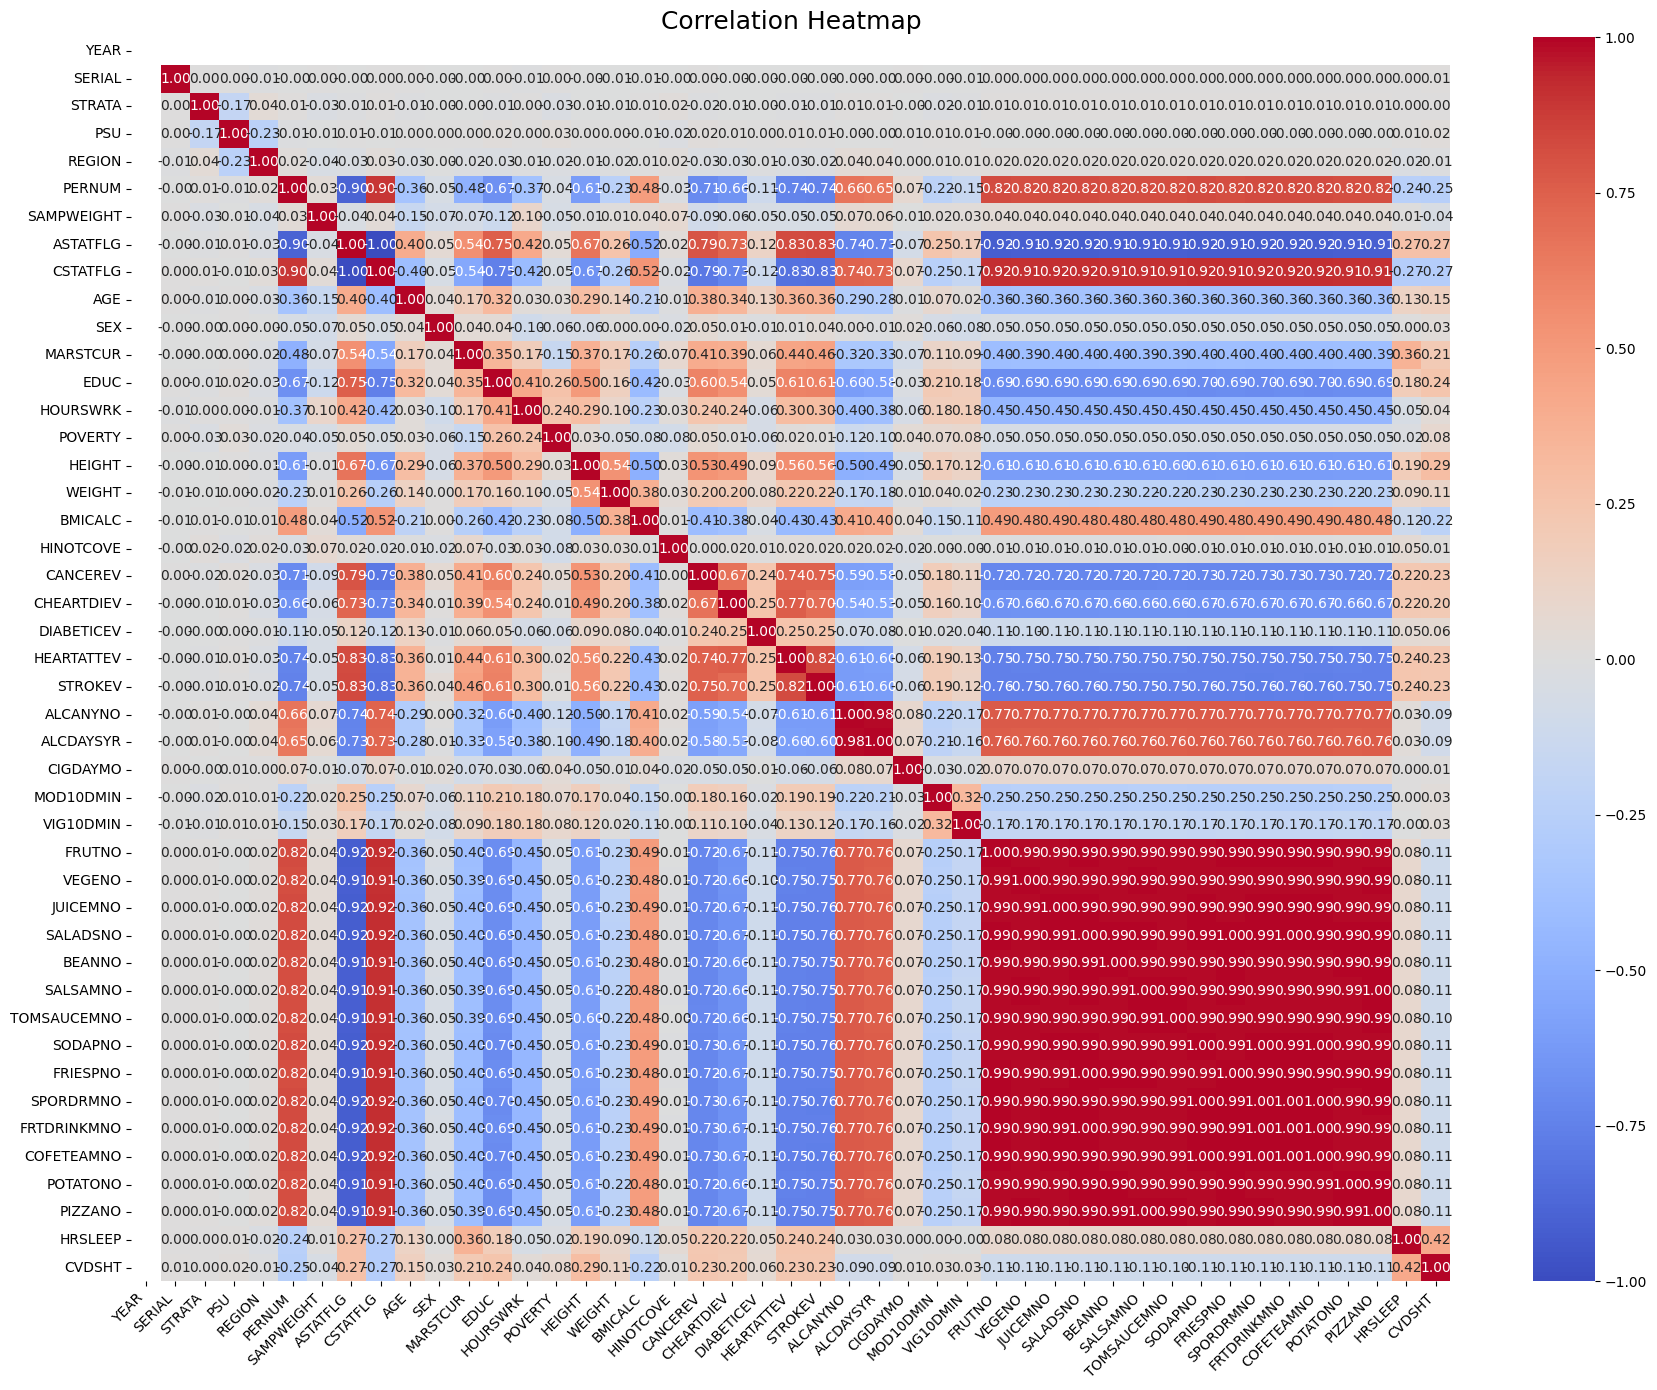

In [17]:
# Calculating the correlation matrix
corr = data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(18, 14))  
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title('Correlation Heatmap', fontsize=18)

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()  
plt.show()

## Data Cleaning

In [18]:
# Removing Irrelavent rows:
data = data.drop(columns=['YEAR', 'SERIAL', 'STRATA', 'PSU', 'REGION', 'PERNUM', 'HHX', 'MARSTCUR', 'EDUC', 'SAMPWEIGHT', 'ASTATFLG', 'CSTATFLG', 'CANCEREV', 'CHEARTDIEV', 'HEARTATTEV', 'STROKEV', 'CVDSHT'], errors='ignore')

'''Any row that is irrelevant to affecting/causing a disease is neglected for better data cleaning and plotting of the graphs.'''
# Have kept all the factors related to any/all kinds of disease (if you want to check for any other diseases)

'Any row that is irrelevant to affecting/causing a disease is neglected for better data cleaning and plotting of the graphs.'

In [19]:
# Checking datashape after cleaning
data.shape

(35115, 29)

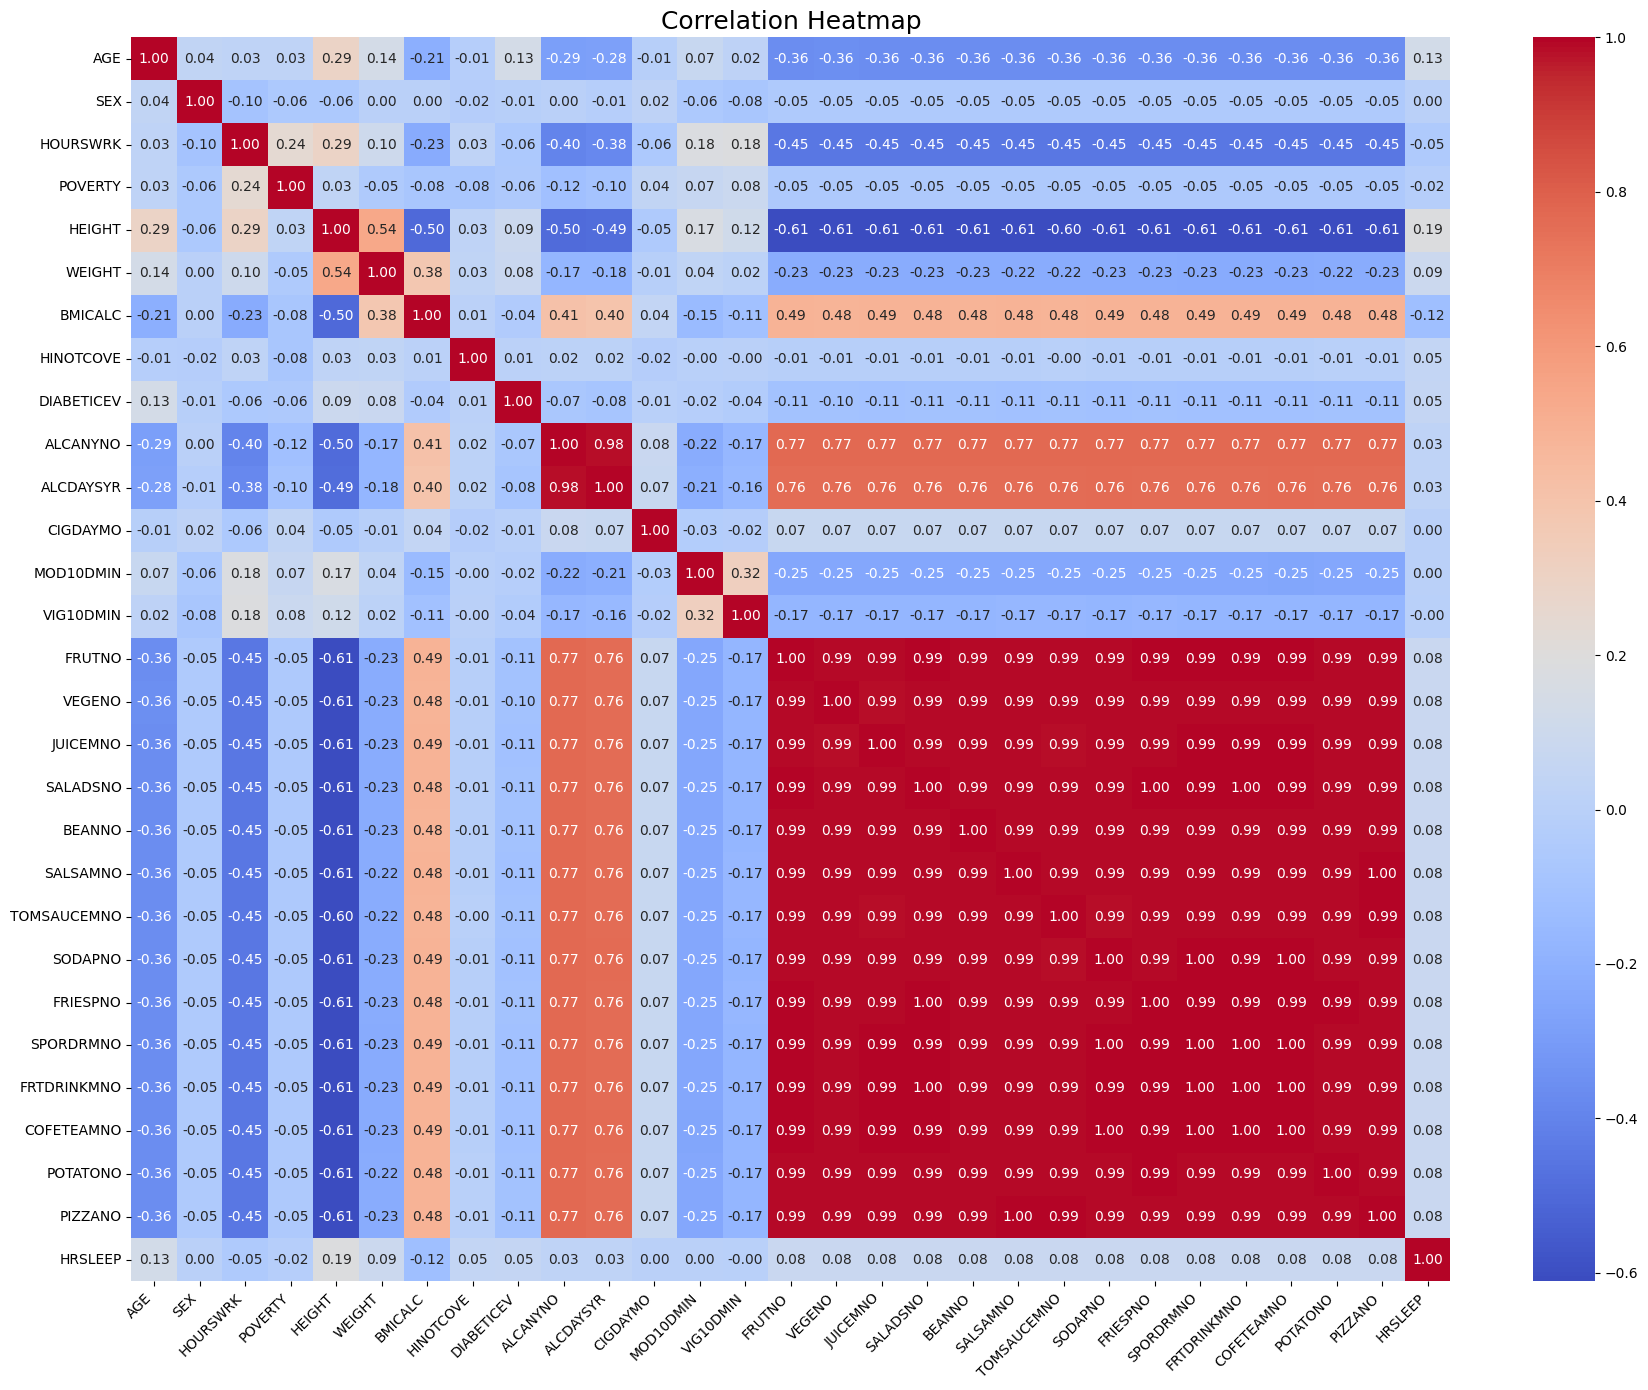

In [20]:
# Calculating the correlation matrix
corr = data.corr()

# Plotting the correlation heatmap
# Plotting the better correlation heatmap
plt.figure(figsize=(18, 14))  # Make figure bigger
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title('Correlation Heatmap', fontsize=18)

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()  
plt.show()

In [21]:
# Displaying selected rows information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35115 entries, 0 to 35114
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          35115 non-null  int64  
 1   SEX          35115 non-null  int64  
 2   HOURSWRK     35115 non-null  int64  
 3   POVERTY      35115 non-null  int64  
 4   HEIGHT       35115 non-null  int64  
 5   WEIGHT       35115 non-null  int64  
 6   BMICALC      35115 non-null  float64
 7   HINOTCOVE    35115 non-null  int64  
 8   DIABETICEV   35115 non-null  int64  
 9   ALCANYNO     35115 non-null  int64  
 10  ALCDAYSYR    35115 non-null  int64  
 11  CIGDAYMO     35115 non-null  int64  
 12  MOD10DMIN    35115 non-null  int64  
 13  VIG10DMIN    35115 non-null  int64  
 14  FRUTNO       35115 non-null  int64  
 15  VEGENO       35115 non-null  int64  
 16  JUICEMNO     35115 non-null  int64  
 17  SALADSNO     35115 non-null  int64  
 18  BEANNO       35115 non-null  int64  
 19  SALS

In [22]:
# Separating predictors (X) and target variable (y)
X = data.drop('DIABETICEV', axis=1)
y = data['DIABETICEV']

# Splitting the data into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

'''Used 'stratify=y' to ensure that the proportion of positive/negative cases stays the same in both sets.'''

# Checking the shape of training and testing data
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (24580, 28)
Testing Set Shape: (10535, 28)


In [23]:
# Standardizing the predictors to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

### 1. Linear SVM

Classification Report for Linear SVM:

              precision    recall  f1-score   support

           1       0.91      1.00      0.96      9631
           2       1.00      0.00      0.00       893
           7       1.00      0.00      0.00         8
           9       1.00      0.00      0.00         3

    accuracy                           0.91     10535
   macro avg       0.98      0.25      0.24     10535
weighted avg       0.92      0.91      0.87     10535



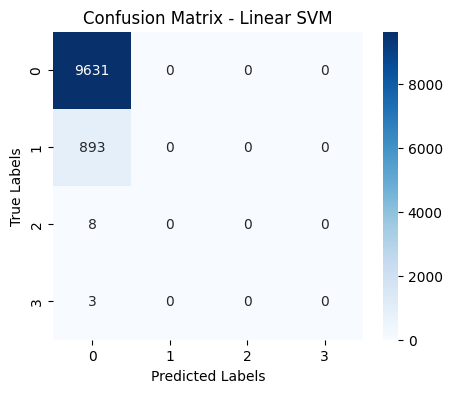

'Trained a Linear SVM model to predict diabetes based on selected features and evaluated its performance.'

In [24]:
linear_svm = SVC(kernel='linear', C=1)

# Fit the model on the training data
linear_svm.fit(X_train_scaled, y_train)

# Prediction on the testing data
y_pred_linear = linear_svm.predict(X_test_scaled)

# Model evaluation
print("Classification Report for Linear SVM:\n")
print(classification_report(y_test, y_pred_linear, zero_division=1))

# Used zero_division=1 to handle undefined precision nicely to fix the imbalance in disease prediction.

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Linear SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

'''Trained a Linear SVM model to predict diabetes based on selected features and evaluated its performance.'''

### 2. Radial SVM (RBF Kernel)

Classification Report for Radial SVM (RBF Kernel):

              precision    recall  f1-score   support

           1       0.91      1.00      0.96      9631
           2       1.00      0.00      0.00       893
           7       1.00      0.00      0.00         8
           9       1.00      0.00      0.00         3

    accuracy                           0.91     10535
   macro avg       0.98      0.25      0.24     10535
weighted avg       0.92      0.91      0.87     10535



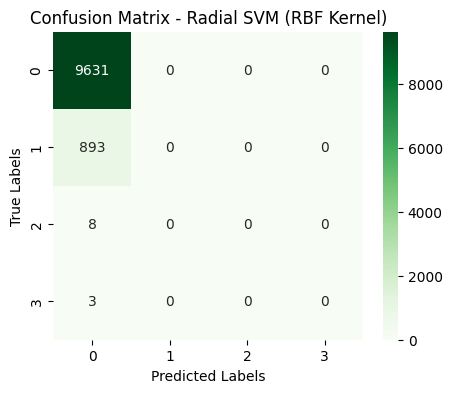

'Trained a SVM with a RBF (Radial Basis Function) kernel, which is useful when the relationship between predictors and target is non-linear.'

In [25]:
rbf_svm = SVC(kernel='rbf', C=0.5, gamma='scale')

# Fit the model on the training data
rbf_svm.fit(X_train_scaled, y_train)

# Prediction on testing data
y_pred_rbf = rbf_svm.predict(X_test_scaled)

# Model evaluation
print("Classification Report for Radial SVM (RBF Kernel):\n")
print(classification_report(y_test, y_pred_rbf, zero_division=1))

# Confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rbf, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix - Radial SVM (RBF Kernel)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

'''Trained a SVM with a RBF (Radial Basis Function) kernel, which is useful when the relationship between predictors and target is non-linear.'''

### 3. Polynomial Kernel SVM

Classification Report for Polynomial SVM:

              precision    recall  f1-score   support

           1       0.91      1.00      0.95      9631
           2       0.00      0.00      0.00       893
           7       0.00      0.00      0.00         8
           9       1.00      0.00      0.00         3

    accuracy                           0.91     10535
   macro avg       0.48      0.25      0.24     10535
weighted avg       0.84      0.91      0.87     10535



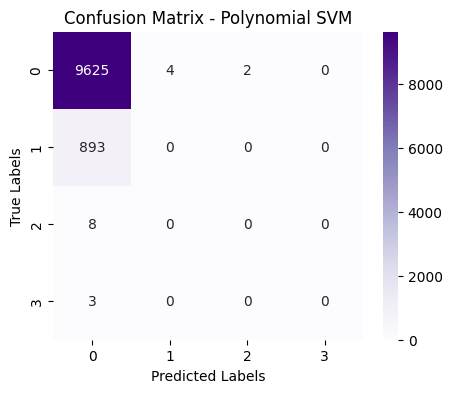

'Trained a SVM with a Polynomial kernel, which allows for flexible decision boundaries.'

In [26]:
# Initialize the model with a polynomial kernel
poly_svm = SVC(kernel='poly', degree=3, C=1, gamma='scale')

# Fit the model on the training data
poly_svm.fit(X_train_scaled, y_train)

# Prediction on testing data
y_pred_poly = poly_svm.predict(X_test_scaled)

# Model evaluation
print("Classification Report for Polynomial SVM:\n")
print(classification_report(y_test, y_pred_poly, zero_division=1))

# Confusion matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(5,4))
sns.heatmap(cm_poly, annot=True, cmap='Purples', fmt='g')
plt.title('Confusion Matrix - Polynomial SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

'''Trained a SVM with a Polynomial kernel, which allows for flexible decision boundaries.''' 
# Polynomial SVMs are useful when data has complex interactions.

### Model Accuracies

In [27]:
# Calculating accuracies
linear_accuracy = accuracy_score(y_test, y_pred_linear)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
poly_accuracy = accuracy_score(y_test, y_pred_poly)

# Comparison table
comparison = pd.DataFrame({
    'Model': ['Linear SVM', 'Radial SVM (RBF)', 'Polynomial SVM'],
    'Accuracy': [linear_accuracy, rbf_accuracy, poly_accuracy]
})

comparison.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,Model,Accuracy
0,Linear SVM,0.914191
1,Radial SVM (RBF),0.914191
2,Polynomial SVM,0.913621


## Sumamry and Conclusion

In [28]:
# Summary
print("Summary:\nIn this project, we used support vector machine (SVM) models to predict whether a person has diabetes based on 29 different features, including age, BMI, sleep hours, work hours, and lifestyle habits like diet, physical activity, and alcohol use.")
print("\nWe tested three types of SVM kernels — linear, radial (RBF), and polynomial — and found that all models achieved over 91% accuracy.")
print("\nThe very small differences between the models suggest that a simple linear model works just as well as more complex ones for this dataset.")

# Conclusion
print("\n\nConclusion:\nThe results demonstrate that diabetes prediction can be effectively performed using readily available demographic, behavioral, and lifestyle variables.")
print("\nWith all the SVM models achieving over 91% accuracy, the findings suggest that a simple linear classifier can be sufficient for real-world applications, offering both high performance and computational efficiency.")
print("\nThese insights could be valuable for healthcare professionals and policymakers looking to design low-cost, scalable early screening tools based on basic health information.")
print("\nEfforts to monitor and promote improvements in physical activity, diet, sleep patterns, and work-life balance could significantly contribute to reducing diabetes risk at a population level.")

Summary:
In this project, we used support vector machine (SVM) models to predict whether a person has diabetes based on 29 different features, including age, BMI, sleep hours, work hours, and lifestyle habits like diet, physical activity, and alcohol use.

We tested three types of SVM kernels — linear, radial (RBF), and polynomial — and found that all models achieved over 91% accuracy.

The very small differences between the models suggest that a simple linear model works just as well as more complex ones for this dataset.


Conclusion:
The results demonstrate that diabetes prediction can be effectively performed using readily available demographic, behavioral, and lifestyle variables.

With all the SVM models achieving over 91% accuracy, the findings suggest that a simple linear classifier can be sufficient for real-world applications, offering both high performance and computational efficiency.

These insights could be valuable for healthcare professionals and policymakers looking to

## Cartoon Plot (for the poster)

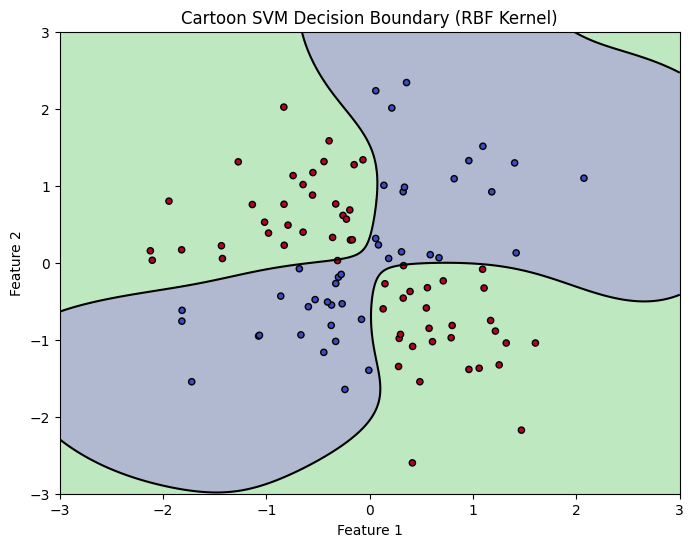

'This plot demonstrates a nonlinear SVM decision boundary using an RBF kernel. The model successfully separates two classes in a 2D feature space, showing how complex boundaries adapt to the data distribution.'

In [33]:
# Toy data
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Training a SVM with RBF kernel
model = svm.SVC(kernel='rbf', gamma=1)
model.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(8,6))

# Model evaluation grid
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Decision boundary and margins
plt.contourf(xx, yy, Z > 0, alpha=0.4)
plt.contour(xx, yy, Z, colors=['k'], linestyles=['-'], levels=[0])

# Scatter points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title("Cartoon SVM Decision Boundary (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

'''This plot demonstrates a nonlinear SVM decision boundary using an RBF kernel. The model successfully separates two classes in a 2D feature space, showing how complex boundaries adapt to the data distribution.'''